# ABOUT THE DATASET

The Loan Approval Prediction Dataset, sourced from Kaggle, contains information about loan applicants and their loan approval status. Key features include:

- Demographic information: Number of dependents, education level, self-employment status
- Financial information: Annual income, loan amount requested, loan term
- Credit information: CIBIL score
- Asset information: Residential, commercial, and luxury asset values, bank asset value
- Target variable: Loan status (Approved/Rejected)

The dataset consists of 4,269 entries with 13 features, providing a comprehensive view of factors potentially influencing loan approval decisions. In this dataset we will be doing binary classification since we are predicting if the loan application of an applicant will be approved or rejected based on the given features.

#### Getting dataset from Kaggle to local Computer(VS Code) 

In [200]:
# Importing all libraries to be used
import opendatasets as od
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

In [201]:
od.download("https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset")

Skipping, found downloaded files in ".\loan-approval-prediction-dataset" (use force=True to force download)


# Load the Data Set

In [202]:
df=pd.read_csv(fr'C:\Users\Sarah\Desktop\Project_02\loan-approval-prediction-dataset\loan_approval_dataset.csv')

# Exploring Dataset

In [203]:
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [204]:
df.tail(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4260,4261,5,Graduate,No,8800000,29300000,10,560,16800000,13900000,31100000,9900000,Approved
4261,4262,3,Graduate,Yes,3000000,7500000,6,881,1400000,4500000,6100000,2300000,Approved
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4263,4264,3,Graduate,No,5000000,12700000,14,865,4700000,8100000,19500000,6300000,Approved
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


## It's a Supervised Machine Lerning Model since the  Prediction we will be making is "Whether a loan will be approved or Rejected based on other features " information is resided in loan_status (target ariable) whiich is provided in the dataset

In [205]:
df.shape

(4269, 13)

###### 4269 rows and 13 columns

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#####  dataset has both numeric and catagorical data

In [207]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

#### catagorical feature :eduaction, self_emplyed and laon_status each has 2 unique values respectively [Graduate,Not],[No,Yes],[Approved,Rejected] 

In [208]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


#### Statistical Analysis

##### numeriical feature laon_id : indicates that there are 1 to 4269 applicants </br>  no_of_dependents:indicates that applicants have are 0 to maximum 5 dependents </br> income_annum : indicates income of applicants are 200000 to maximum 9900000 </br> laon_amount: indicating that the amount of loan requested by the applicants  is minimum 300000 to maximum 39500000 </br> 75% of bank_asset values are below 7100000

# Data Cleaning

### Checking for Duplicates

In [209]:
df.duplicated().sum()

0

##### there are no duplicates in the dataset

### Checking for Null values

In [210]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

##### No null values in the dataset 

In [211]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

### Removing unecessary spaces in Columns name and Column values , since it can produce unecessary errors in future

In [212]:
df.columns = df.columns.str.strip()
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [213]:
df['education'] = df['education'].str.strip()
df['self_employed'] =df['self_employed'].str.strip()
df['loan_status'] =df['loan_status'].str.strip()

##### no null values double check

In [214]:
print(df.isnull().sum())

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [215]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

# Outliers Minning

### Detecting Outlier by Visualization

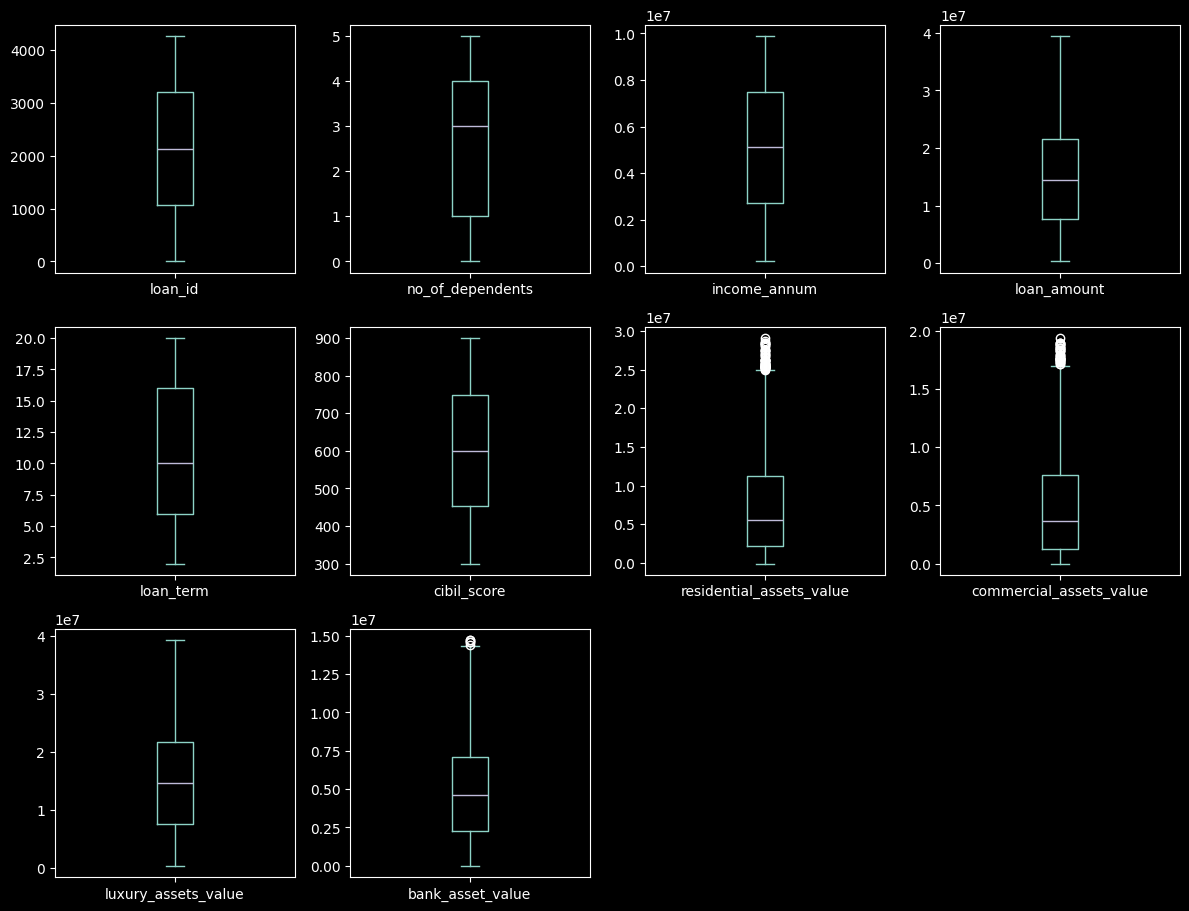

In [216]:
df.plot(kind='box', figsize= (12,12), layout=(4,4), sharex= False, subplots= True) ;plt.tight_layout()

##### Outliers detected in features bank_asset_value :indicating there are few applicants having more than 1400000 in their bank accounts </br> residentoal_assets_value and commercial_assets_value : indicating there are few applicants having more value of residential and commercial assets 

### Detecting Outliers using IQR

In [217]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

### Detecting Outliers using Z_score

In [218]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[z_scores > threshold]
    return outliers

In [219]:
# Detect outliers using both methods
for column in df.select_dtypes(include=[np.number]).columns:
    iqr_outliers = detect_outliers_iqr(df, column)
    zscore_outliers = detect_outliers_zscore(df, column)
    
    print(f"\nColumn: {column}")
    print(f"IQR method outliers: {len(iqr_outliers)}")
    print(f"Z-score method outliers: {len(zscore_outliers)}")


Column: loan_id
IQR method outliers: 0
Z-score method outliers: 0

Column: no_of_dependents
IQR method outliers: 0
Z-score method outliers: 0

Column: income_annum
IQR method outliers: 0
Z-score method outliers: 0

Column: loan_amount
IQR method outliers: 0
Z-score method outliers: 0

Column: loan_term
IQR method outliers: 0
Z-score method outliers: 0

Column: cibil_score
IQR method outliers: 0
Z-score method outliers: 0

Column: residential_assets_value
IQR method outliers: 52
Z-score method outliers: 16

Column: commercial_assets_value
IQR method outliers: 37
Z-score method outliers: 17

Column: luxury_assets_value
IQR method outliers: 0
Z-score method outliers: 0

Column: bank_asset_value
IQR method outliers: 5
Z-score method outliers: 0


##### IQR method detect more outliers in al three outlier holding feature whereas Z-score detect lesser

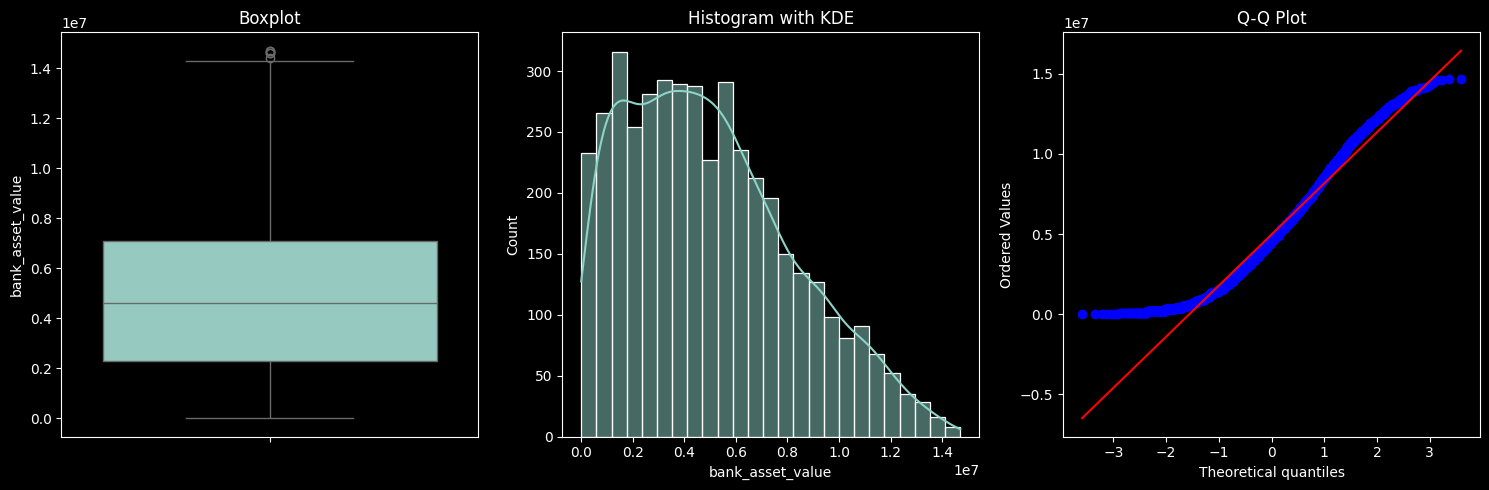

In [220]:
# Visualization fot bank_asset_value
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.boxplot(df['bank_asset_value'])
plt.title('Boxplot')
    
plt.subplot(1, 3, 2)
sns.histplot(df['bank_asset_value'], kde=True)
plt.title('Histogram with KDE')
    
plt.subplot(1, 3, 3)
stats.probplot(df['bank_asset_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
    
plt.tight_layout()
plt.show()

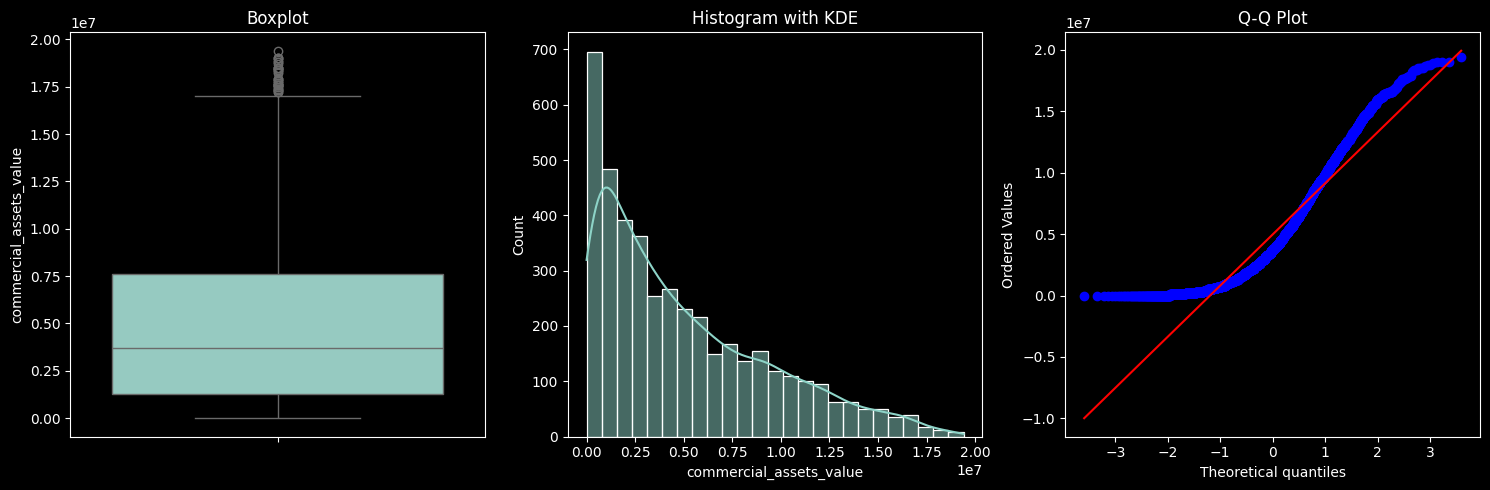

In [221]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.boxplot(df['commercial_assets_value'])
plt.title('Boxplot')
    
plt.subplot(1, 3, 2)
sns.histplot(df['commercial_assets_value'], kde=True)
plt.title('Histogram with KDE')
    
plt.subplot(1, 3, 3)
stats.probplot(df['commercial_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
    
plt.tight_layout()
plt.show()

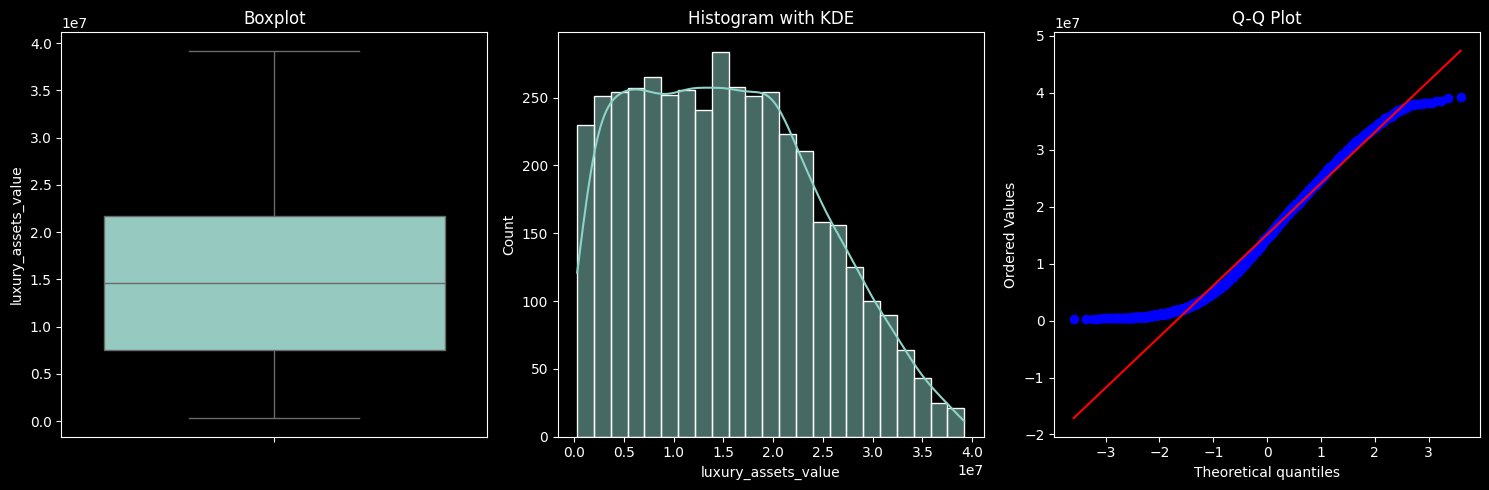

In [222]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.boxplot(df['luxury_assets_value'])
plt.title('Boxplot')
    
plt.subplot(1, 3, 2)
sns.histplot(df['luxury_assets_value'], kde=True)
plt.title('Histogram with KDE')
    
plt.subplot(1, 3, 3)
stats.probplot(df['luxury_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
    
plt.tight_layout()
plt.show()

### Boxplots showing potential outliers as individual points. that are Extreme
### Histograms showing the overall distribution of the data. that is Skewed and not Normal
### Q-Q plots clearly showing that data is not Normally distributed (points should roughly form a straight line).
### Under these circumtances we should go with IQR method rather than Z- score which calculates deviation aaround mean of the data

# Treating Outliers

### Caping with Outliers , In the dataset loan Approval , extreme values in commercial , luxury and bank asset values are possible since there can be people having lots of money in Bank and having more worth properties  , as it can be crucial values for our analysis and modelling we will cape with it

In [223]:
def cap_outliers(df, column, method='IQR'):
    if method == 'IQR':
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
    elif method == 'zscore':
        mean = df[column].mean()
        std = df[column].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std
    
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Apply to all numerical columns
for column in df.select_dtypes(include=[np.number]).columns:
    df = cap_outliers(df, column, method='IQR')  # or 'zscore'

In [224]:
df.shape

(4269, 13)

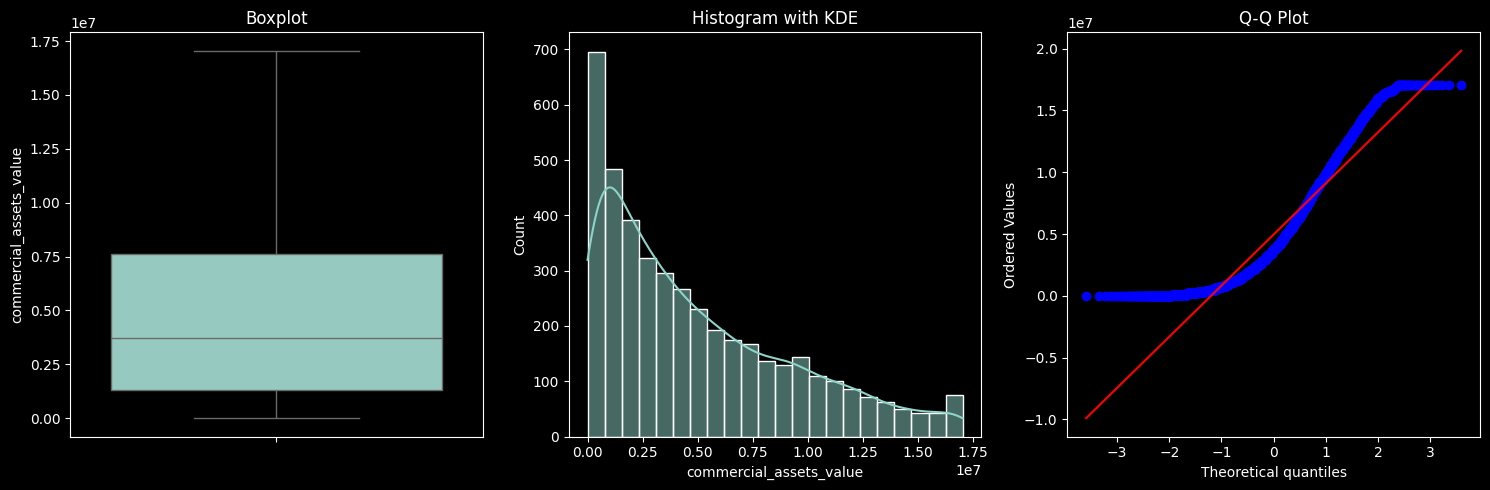

In [225]:
# Visualization fot commercial_assets_value
plt.figure(figsize=(15, 5))
    
plt.subplot(1, 3, 1)
sns.boxplot(df['commercial_assets_value'])
plt.title('Boxplot')
    
plt.subplot(1, 3, 2)
sns.histplot(df['commercial_assets_value'], kde=True)
plt.title('Histogram with KDE')
    
plt.subplot(1, 3, 3)
stats.probplot(df['commercial_assets_value'], dist="norm", plot=plt)
plt.title('Q-Q Plot')
    
plt.tight_layout()
plt.show()

### Now there are more values between values 0.25 and 0.75

# Exploratory Data Analysis (EDA)

## PROFILING

In [226]:
profile= ProfileReport(df)
profile.to_file(output_file="loan_approval_prediction.html")

Summarize dataset:  75%|███████▌  | 15/20 [00:00<00:00,  6.42it/s, Calculate auto correlation]               c:\Users\Sarah\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Graduate'')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 125.10it/s]


In [227]:
#Identifying Unique values
columns_to_count = ['no_of_dependents', 'education', 'self_employed',
      'loan_term', 'loan_status']
for col in columns_to_count:
    print(df[col].value_counts())
    print() 

no_of_dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

self_employed
Yes    2150
No     2119
Name: count, dtype: int64

loan_term
6     490
12    456
4     447
10    436
18    422
16    412
20    411
14    405
2     404
8     386
Name: count, dtype: int64

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64



## Correlation Between Features

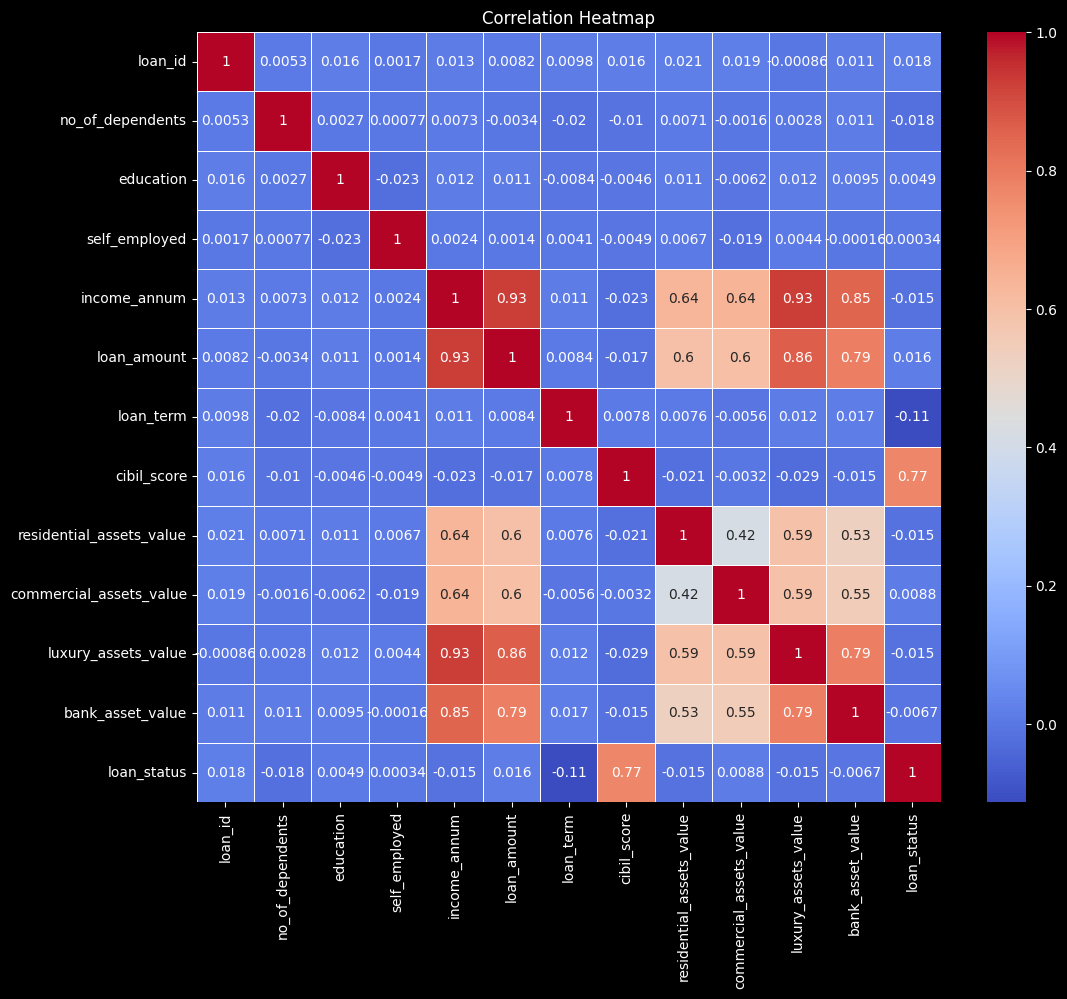

In [228]:
# Making a copy of the dataframe to avoid modifying the original
df_corr = df.copy()

# Encoding binary categorical variables 
binary_cats = ['education', 'self_employed', 'loan_status']
for col in binary_cats:
    df_corr[col] = df_corr[col].map({'No': 0, 'Yes': 1, 'Not Graduate': 0, 'Graduate': 1, 'Rejected': 0, 'Approved': 1})

plt.figure(figsize=(12, 10))
# Create a correlation matrix using the numeric columns
correlation_matrix = df_corr.corr()
# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Really strong positive Correaltion between loan amount and income annum and vice versa 
#### Then high Correlation between  luxury asset value and income annum and vice versa
#### then luxury asset value and loan amount and vice versa
#### then bank asset value and income annum and vice versa
#### then bank asset value and loan amount and vice versa
#### then bank asset value and luxury asset value and vice versa
#### then loan status and cibil score and vice versa 
#### then income annum and residential and commercial asset value and vice versa
#### then loan amount and residential and commercial asset value and vice versa
#### then luxury asset value and residential and commercial asset value and vice versa
#### then commercial asset value and bank asset value and vice versa 
#### then residential asset value and bank asset value 
#### others either have very low positive or negative correlation 
#### loan_status have negative correlation with bank , residential ,  and luxury asset value also for income annum and no of dependents 
####  Moderate positive correlations between asset values (residential, commercial, luxury) and loan amount
####  - CIBIL score, income, and asset values seem to be important factors in loan approval
#### the loan approval has high positive correlation between cibil_score(credit history), other feature has either very low positive or negative correlation with loan approval indicating other features donot necessarily indicates that the loan is approved eg because the person was graduate or that it commercial asset value is higher 
#### as the loan term increases the loan status decreases indicating that Applucants asking for long term loan tends to get rejected

## DISTRIBUTION OF THE DATASET EACH FEATURE

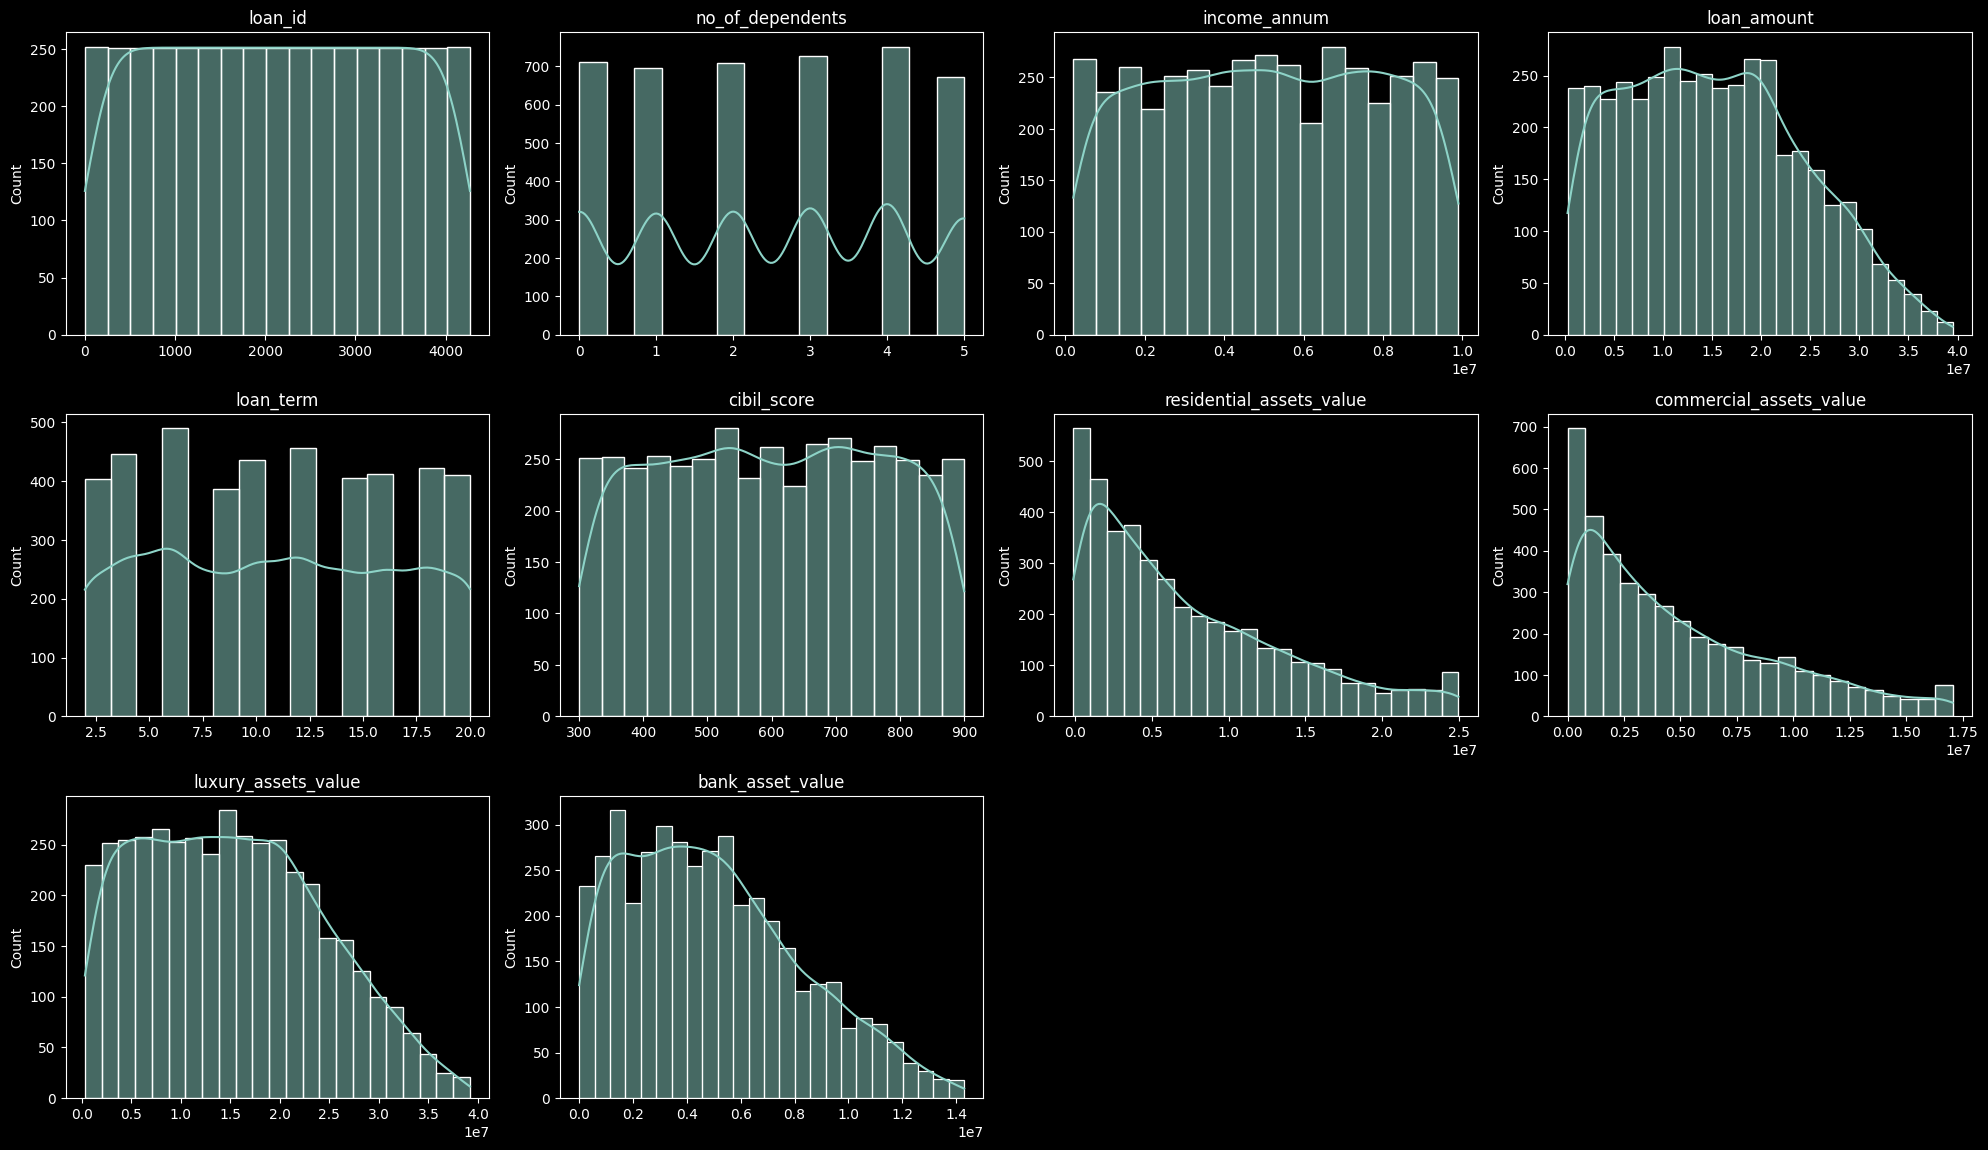

In [229]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up the plot
plt.figure(figsize=(20, 15))

# Create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(column)
    plt.xlabel('')  

plt.tight_layout()
plt.show()

### Insights 

##### There are more appliacants in the dataset they are either renting or living in other people space
##### More applicants  are Approved in the dataset
##### There are more applicants having 4 no of dependents and less with 0 - 3 and 5
##### Income annum majority lies b/w 0.4 and 0.6 
##### majority is in loan amount 1.1
##### there are more applicants with loan term of 6 years 
##### many applicants donot have any commercial asset 
##### majority luxury asset value is 1.5 
##### More applicants have the bank asset value of 0.1
#### dataset have almost equal educated and uneducated / self - employed and not self emplyed applicants 

In [230]:
px.pie(df, values='loan_id', names ='education', title  ='% of Graduate and Ungraduate Applicants in dataset', color_discrete_sequence = px.colors.qualitative.T10)

In [231]:
px.pie(df, values='loan_id', names ='self_employed', title  ='% of self_employed people and rejection in dataset', color_discrete_sequence = px.colors.qualitative.T10)

In [232]:
px.pie(df, values='loan_id', names ='loan_status', title  ='% of Approval and rejection in dataset', color_discrete_sequence = px.colors.qualitative.T10)

##### sample has slightly more educated Applicants , and slightly more self_emplyed Applicants
##### dataset have more Approved loan status then Rejected

## Visualizing NUMERIC FEATURES RELATIONSHIP(CORRELATION)

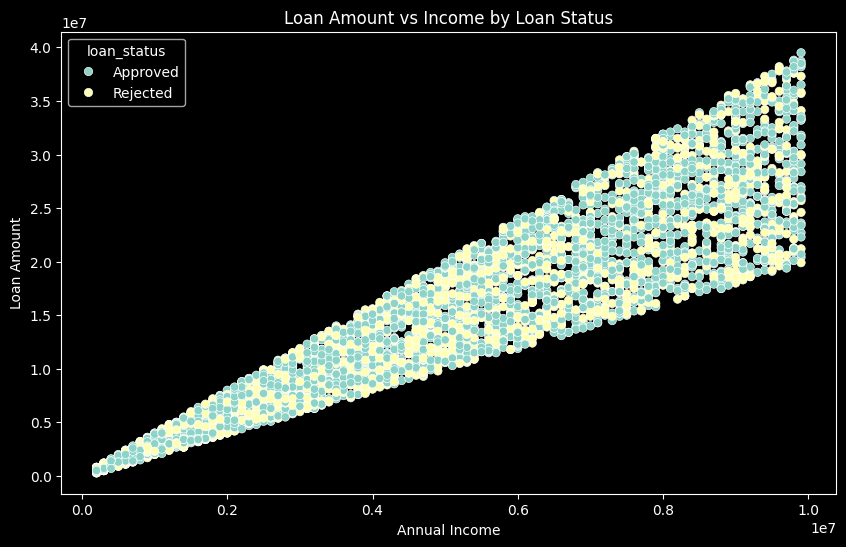

In [233]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income by Loan Status')
plt.show()

##### Applicants with high income tends to take apply for high loan amounts

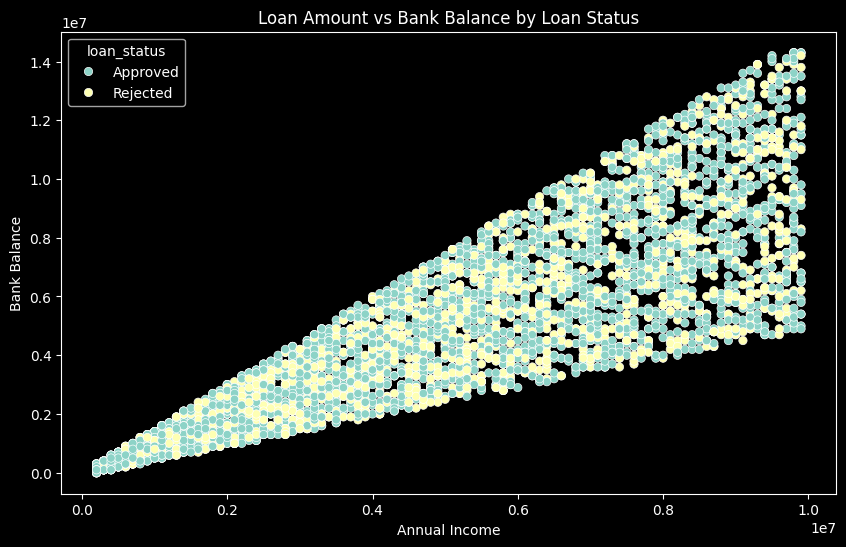

In [234]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income_annum', y='bank_asset_value', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Bank Balance')
plt.title('Loan Amount vs Bank Balance by Loan Status')
plt.show()

##### Applicants with high income tends to have more balance in their bank accounts 

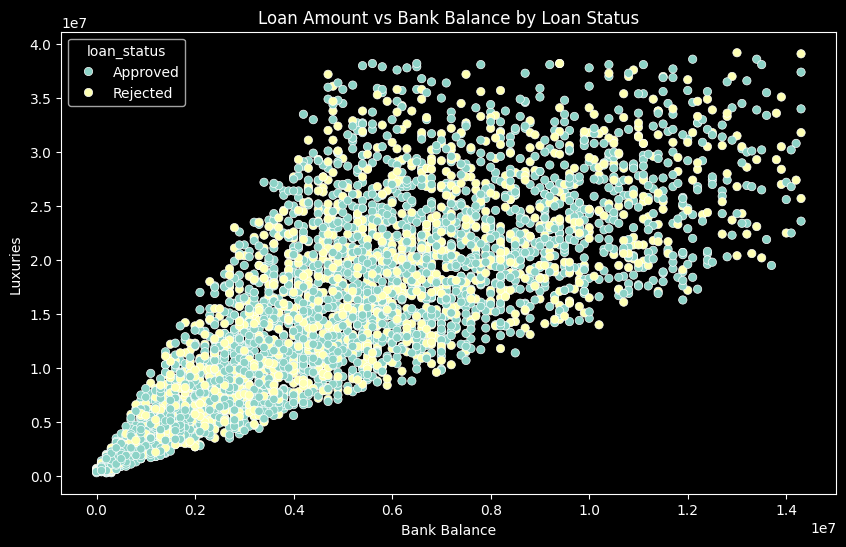

In [235]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bank_asset_value', y='luxury_assets_value' , hue='loan_status')
plt.xlabel('Bank Balance')
plt.ylabel('Luxuries ')
plt.title('Loan Amount vs Bank Balance by Loan Status')
plt.show()

##### Applicants with more balance in their accounts tend to buy high value luxury items 

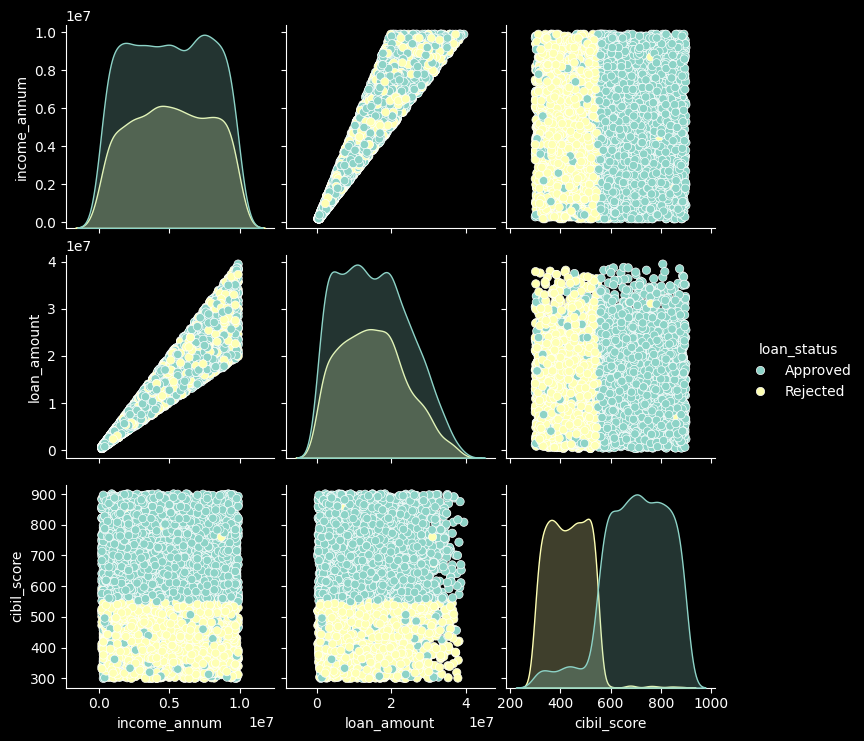

In [236]:
#Pair plot for key numeric variables:
sns.pairplot(df[['income_annum', 'loan_amount', 'cibil_score', 'loan_status']], hue='loan_status')
plt.show()

#### No relation between cibil score and income anum and loan amount

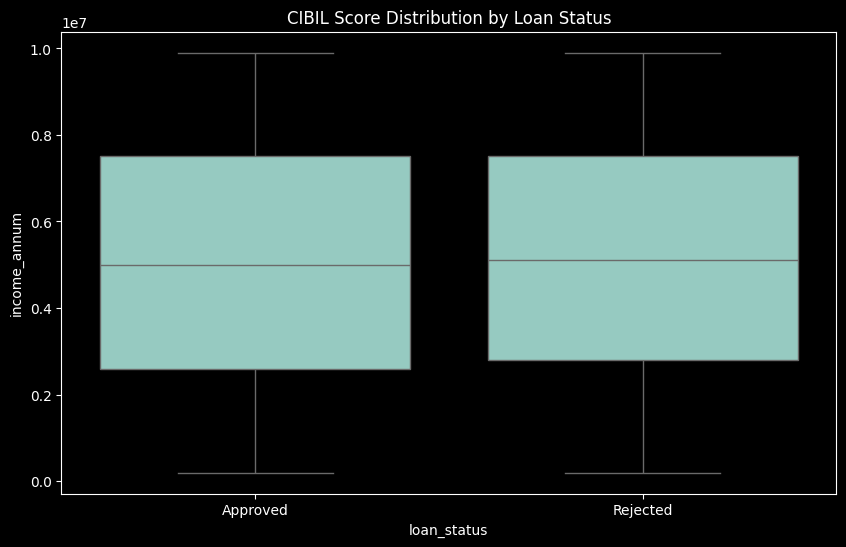

In [237]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='income_annum', data=df)
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()

##### Income donnot correspond to the Acceptance or Rejection of the loan 

## ANALYZING THE FEATURE HAVING THE HIGH CHANCE OF LOAN APPROVAL

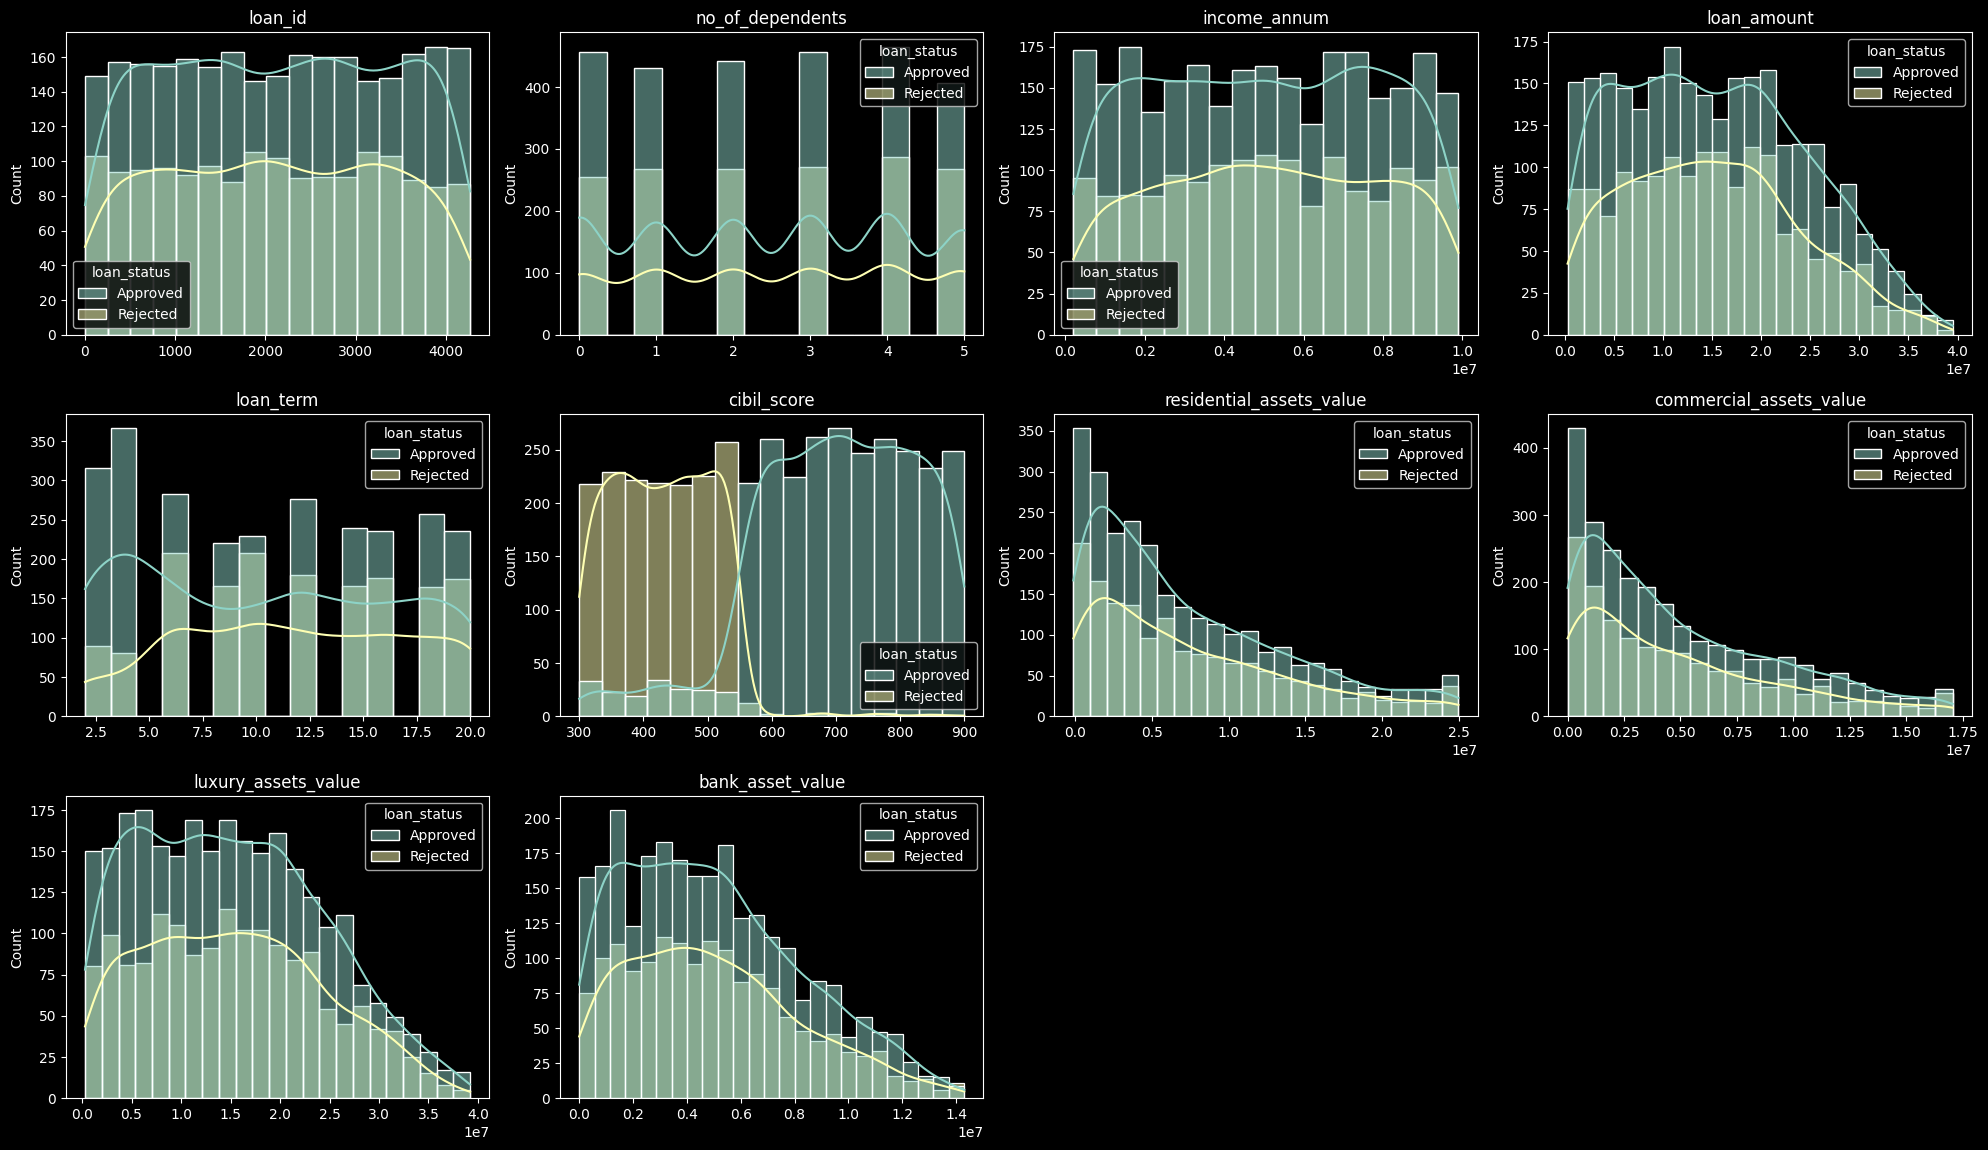

In [238]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Set up the plot
plt.figure(figsize=(20, 15))

# Create subplots
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=column, kde=True, hue='loan_status')
    plt.title(column)
    plt.xlabel('')  

plt.tight_layout()
plt.show()

##### As the cibil_score increases the Approval of loan status has been seen 
##### INDICATING applicants having a good credit history and loan replayment tends to have higher chances of loan approval

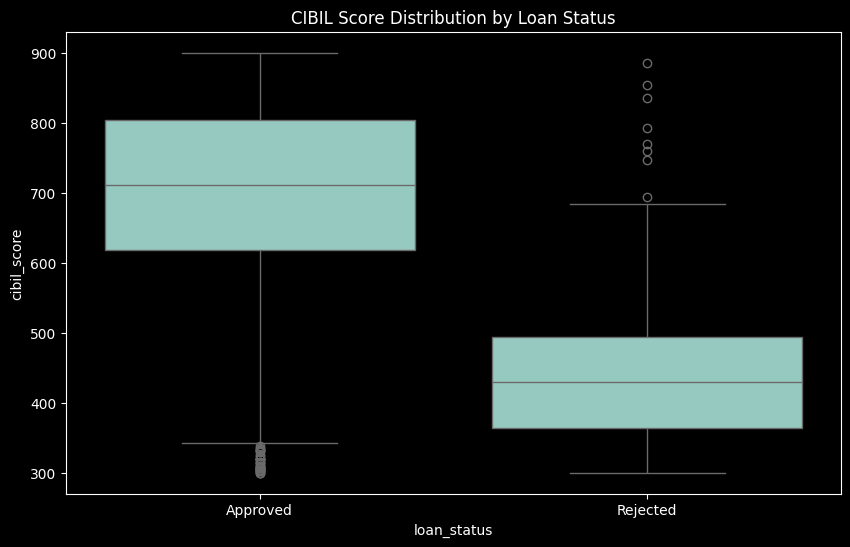

In [239]:
# CIBIL score distribution by loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('CIBIL Score Distribution by Loan Status')
plt.show()

##### INDICATING applicants having a good credit history and loan replayment tends to have higher chances of loan approval, highest loan rejection is in region below 500 cibil score , where as above 600 cibil_score Applicants  tends to get approved except for few people 

###  Analyzing Cause of the  Outlier

CIBIL Score range:
count    4269.000000
mean      599.936051
std       172.430401
min       300.000000
25%       453.000000
50%       600.000000
75%       748.000000
max       900.000000
Name: cibil_score, dtype: float64

Number of high CIBIL score (>700) rejections: 7


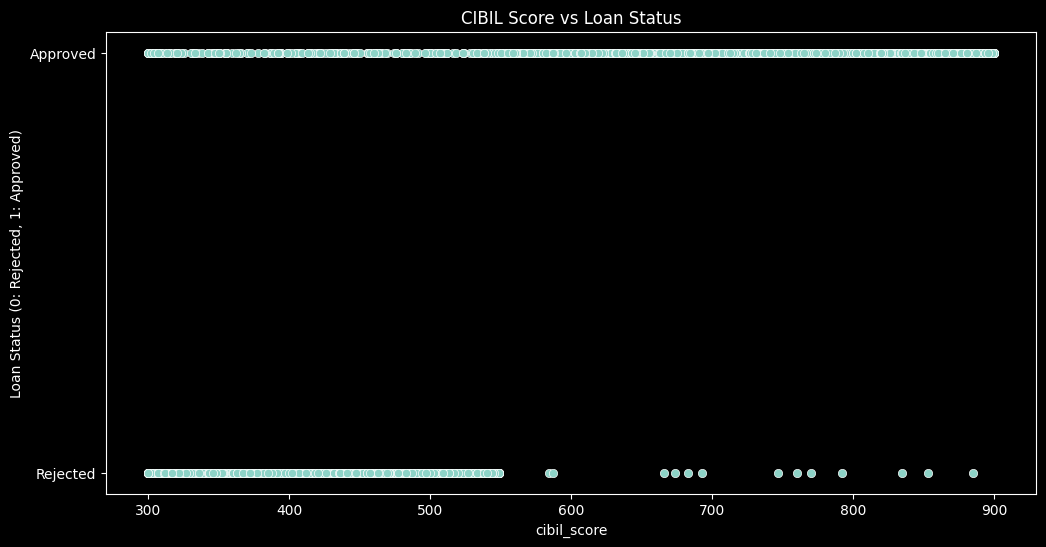

In [240]:
print("CIBIL Score range:")
print(df['cibil_score'].describe());

high_cibil_threshold = 700  # Adjust this value based on the CIBIL score range in your dataset
high_cibil_rejected = df[(df['cibil_score'] > high_cibil_threshold) & (df['loan_status'] == 'Rejected')]
print(f"\nNumber of high CIBIL score (>{high_cibil_threshold}) rejections: {len(high_cibil_rejected)}");

plt.figure(figsize=(12, 6))
sns.scatterplot(x='cibil_score', y='loan_status', data=df)
plt.title('CIBIL Score vs Loan Status')
plt.ylabel('Loan Status (0: Rejected, 1: Approved)')
plt.show();

##### There are about 7 Applicants who have a higher cibil_score but got rejected

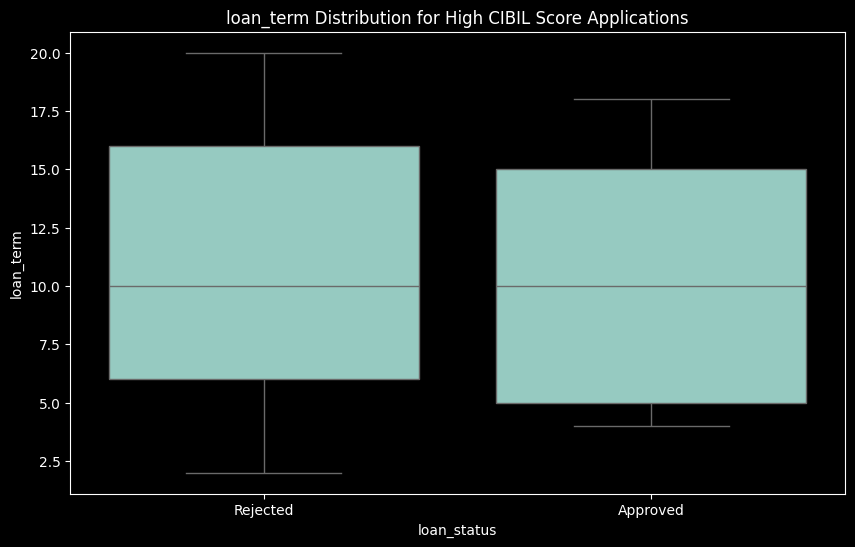

In [241]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_term', data=df[df['cibil_score'] > high_cibil_threshold])
plt.title(f'{'loan_term'} Distribution for High CIBIL Score Applications')
plt.xticks([0, 1], ['Rejected', 'Approved'])
plt.show()

#### We know that the only Feature  which has low positive correlation with cibil_score is loan_term, others have low negative relation
#### Indiicating that people having high score credit history may tend to ask for high loan_term which in result leads to their rejection even after having high cibil_score

# MODELLING

## FEATURE SELECTION

In [242]:
# Drop unnecessary columns
columns_to_drop = ['loan_id']
df = df.drop(columns=columns_to_drop)

# Select features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Encode categorical variables
X = pd.get_dummies(X, drop_first=True)
y = y.map({'Rejected': 0, 'Approved': 1})

## Manual Data Splitting:

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling:

In [244]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training (KNN):

In [245]:
knn = KNeighborsClassifier(n_neighbors=16)  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=16)

## Model Evaluation:

Accuracy: 0.9016
Precision: 0.9330
Recall: 0.9086
F1-score: 0.9206
ROC-AUC: 0.8993


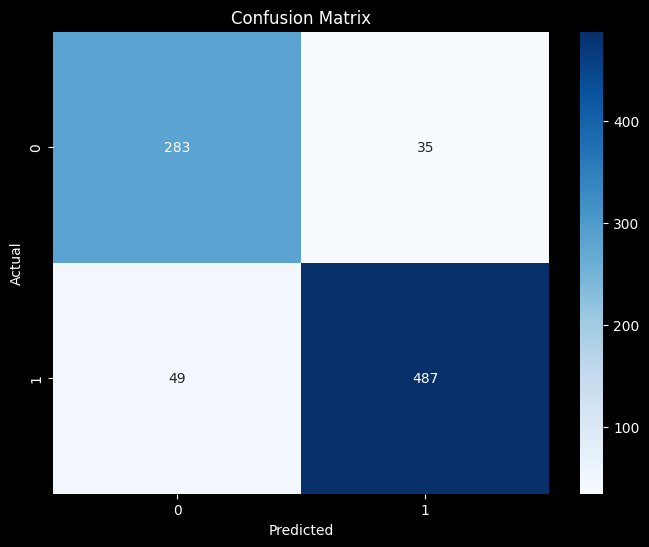

In [246]:
# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Cross-validation:

In [247]:
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.88726208 0.89751098 0.91508053 0.91800878 0.92093704]
Mean CV score: 0.9078


## ROC Curve:

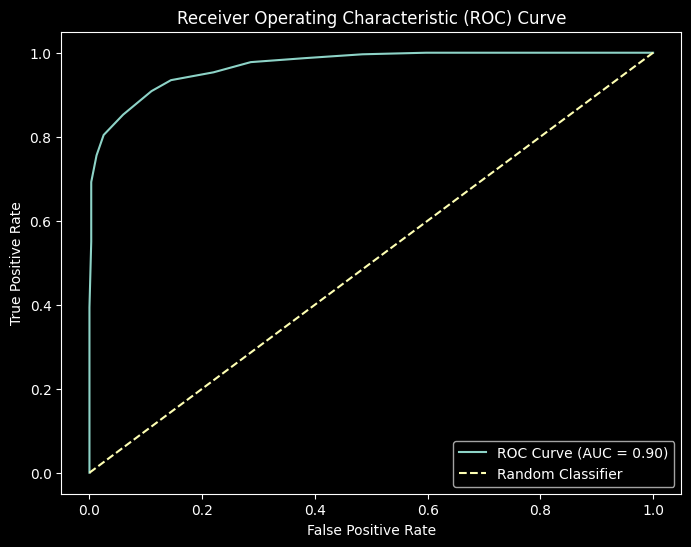

In [248]:
from sklearn.metrics import roc_curve

y_pred_proba = knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Detailed Model Performance Insights:

##### Accuracy: 0.9016 - The model correctly predicts loan approval status for 90.16% of cases.
##### Precision: 0.9330 - When the model predicts loan approval, it's correct 93.30% of the time.
##### Recall: 0.9086 - The model correctly identifies 90.86% of all actual approved loans.
##### F1-score: 0.9206 - Indicates a good balance between precision and recall.
##### ROC-AUC: 0.8993 - Shows strong discriminative ability between approved and rejected loans.

### Confusion Matrix:

##### True Positives: 283
##### False Positives: 35
##### False Negatives: 49
##### True Negatives: 487

#### Cross-validation scores: [0.88726208, 0.89751098, 0.91508053, 0.91800878, 0.92093704]
#### Mean CV score: 0.9078

## The consistent and high cross-validation scores indicate model stability and good generalization ability. The ROC Curve with an AUC of 0.90 further confirms the model's strong ability to distinguish between classes.

# CONCLUSION

The K-Nearest Neighbors (KNN) model developed for loan approval prediction demonstrates strong performance and reliability:

1. High Accuracy: With an accuracy of 90.16%, the model shows excellent overall predictive capability.

2. Balanced Performance: High precision (93.30%) and recall (90.86%) indicate the model's effectiveness in both approving worthy candidates and identifying potential defaults.

3. Robust Discrimination: An ROC-AUC score of 0.8993 suggests the model's strong ability to distinguish between approved and rejected loan applications.

4. Consistency: Cross-validation scores (mean 0.9078) demonstrate the model's stability across different data subsets, indicating good generalizability.

5. Key Factors: The analysis highlighted CIBIL score, income, and loan amount as crucial factors in loan approval decisions.

6. Practical Applicability: The model's performance suggests it could be a valuable tool in assisting loan approval decisions in real-world scenarios.